# SecurityDataAnalysis, Midterm, 2023 Fall


- 1,2,3 are worth 10 points each, 4 is worth 20 points, 5 is worth 40 points, and 6 is worth 10 points, for a total of 100 points.
- 1,2,3은 각 10점, 4는 20점, 5는 40점, 6은 10점, 총 100점 만점

## Below are analytics questions that use attached data.
## 이하는 첨부된 데이터를 사용하는 분석 문제입니다.

### Evaluation Criteria (평가기준)

- You need to fully discuss your results, i.e., explain what they mean in terms of real-world implications.
- The higher the model scores (relative to other students), the better, but I will also evaluate the correctness, justifiability, sufficiency, and appropriateness of the process (you are welcome to test any code, but if you feel it does not meet these criteria, please delete it and turn it in).

- 결과에 대해서 충분히 논의할 수 있어야 함, 즉, 결과가 의미하는 바를 현실세계의 시사점으로 올바르게 해석하여 설명할 수 있어야 함
- (타 학생과 비교하여 상대적으로) score가 높은 모델을 구축할수록 좋은 점수를 부여하되, 과정의 올바름 및 타당성, 충분성, 적절성을 같이 평가함 (어떤 코드든 테스트 해 보는 것은 무방하나, 이 기준에 맞지 않는다고 생각되면 삭제하고 제출)

### The given data is Fraud data to create a credit card fraud transaction detection model.
### 주어진 데이터는 신용카드 사기 거래 탐지 모델을 만들기 위한 Fraud 데이터입니다.

## 4. Describe your understanding of your data by conducting an exploratory data analysis (EDA).
## 4. EDA(Exploratory Data Analysis)를 하여 본인의 데이터에 대한 이해를 기술하시오

***

### Preparing & Refining Data

In [215]:
import matplotlib.pyplot        as plt
import numpy                    as np
import pandas                   as pd
import seaborn                  as sns
from imblearn.over_sampling     import SMOTE
from imblearn.over_sampling     import SMOTEN
from imblearn.over_sampling     import SMOTENC
from sklearn.linear_model       import Lasso
from sklearn.linear_model       import Ridge
from sklearn.linear_model       import LinearRegression
from sklearn.model_selection    import train_test_split
from sklearn.neighbors          import KNeighborsClassifier
from sklearn.neighbors          import KNeighborsRegressor
from sklearn.preprocessing      import RobustScaler
from sklearn.preprocessing      import MinMaxScaler
from sklearn.preprocessing      import StandardScaler

#### About Features
- id, category, amount, gender, zip
- lat/long (latitude/longitude), city_pop(city population)
- job, merch_lat(merchant latitude)/merch_long(merchant longitude)
- is_fraud (1 if fraud)

**Q1. 데이터의 샘플 수는 모두 몇 개인가?**\
A1. 10,486개.

In [216]:
df = pd.read_csv('fraud_small.csv')
df_origin = df.copy()

In [217]:
df

,ID,category,amount,gender,zip,lat,long,city_pop,job,merch_lat,merch_long,is_fraud
0,1,kids_pets,43.17,M,31042,32.8088,-83.1740,1841,Film/video editor,32.354787,-84.081335,0
1,2,food_dining,60.05,M,64659,39.7795,-93.3014,964,Tourist information centre manager,39.986066,-93.931767,0
2,3,shopping_net,4.72,M,16314,41.5205,-80.0573,5507,Retail merchandiser,42.337299,-79.533712,0
3,4,shopping_net,6.84,F,13615,44.0577,-76.0196,1271,"Producer, radio",43.546296,-76.541295,0
4,5,food_dining,87.88,F,72011,34.5091,-92.4828,4074,"Scientist, audiological",35.051319,-91.791157,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10481,10482,travel,7.45,M,12093,42.4999,-74.6117,1666,Diagnostic radiographer,42.304253,-75.422895,0
10482,10483,gas_transport,68.06,M,61272,41.2153,-90.9879,1504,Manufacturing engineer,40.770761,-90.222300,0
10483,10484,grocery_pos,46.98,F,30009,34.0770,-84.3033,165556,Prison officer,33.175753,-84.674493,0
10484,10485,home,197.12,F,7980,40.6774,-74.4968,2307,Science writer,41.244181,-74.635860,0


In [218]:
df.set_index('ID', inplace=True)
df.head(3)

,category,amount,gender,zip,lat,long,city_pop,job,merch_lat,merch_long,is_fraud
ID,,,,,,,,,,,
1,kids_pets,43.17,M,31042,32.8088,-83.1740,1841,Film/video editor,32.354787,-84.081335,0
2,food_dining,60.05,M,64659,39.7795,-93.3014,964,Tourist information centre manager,39.986066,-93.931767,0
3,shopping_net,4.72,M,16314,41.5205,-80.0573,5507,Retail merchandiser,42.337299,-79.533712,0


**Q2. 결측값이 있는가? Fraud의 개수는 몇 개인가?**\
A2. 존재하지 않는다. Fraud 샘플은 60개이다.

In [54]:
display(df.describe())
display(df.drop(columns=['category', 'gender', 'zip', 'job']).groupby('is_fraud').count())

print('Count of categories:', len(df.category.unique()))
print('List of genders:', df.gender.unique())
print('Count of zip codes:', len(df.zip.unique()))
print('Count of jobs:', len(df.job.unique()))
print('Total cases:', df.shape[0])
print('Total cases after drop N/A:', df.dropna(how='all').shape[0])

,amount,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud
count,10486.000000,10486.000000,10486.000000,10486.000000,1.048600e+04,10486.000000,10486.000000,10486.000000
mean,73.928448,48688.911883,38.534421,-90.195726,8.283058e+04,38.533778,-90.193244,0.005722
std,291.026199,27053.582272,5.055667,13.890207,2.868144e+05,5.094306,13.905735,0.075430
min,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,19.041880,-166.646444,0.000000
25%,9.680000,25442.000000,34.668900,-96.786900,7.370000e+02,34.772312,-96.867594,0.000000
50%,47.095000,48088.000000,39.401500,-87.458100,2.456000e+03,39.399266,-87.382677,0.000000
75%,84.307500,72047.000000,41.846700,-80.065200,2.032800e+04,41.879831,-80.088306,0.000000
max,26544.120000,99783.000000,65.689900,-67.950300,2.906700e+06,65.921717,-66.978308,1.000000


,amount,lat,long,city_pop,merch_lat,merch_long
is_fraud,,,,,,
0,10426,10426,10426,10426,10426,10426
1,60,60,60,60,60,60


Count of categories: 14
List of genders: ['M' 'F']
Count of zip codes: 905
Count of jobs: 475
Total cases: 10486
Total cases after drop N/A: 10486


**Q3. 데이터의 Feature은 어떤 모습인가?**\
A3. category, gender, zip, job, is_fraud는 categorial variable,\
amount, lat, long, city_pop, merch_lat, merch_long은 continuous variable이다.

zip코드의 경우 연속형 변수처럼 보이나 (절대적, 상대적) 0이 존재하지 않기에 명목변수이다.\
is_fraud를 제외한 나머지 feature를 이용하여 is_fraud를 추론할 수 있으리라 판단된다.

In [52]:
TOTAL_ROWS = 10_486
TOTAL_FRAUDS = 60
CATEGORICAL_LIST = ['category', 'gender', 'zip', 'job', 'is_fraud']

,amount,lat,long,city_pop,merch_lat,merch_long
amount,1.000000,-0.013772,0.004000,-0.000637,-0.014631,0.004045
lat,-0.013772,1.000000,-0.029590,-0.141424,0.993561,-0.029225
long,0.004000,-0.029590,1.000000,-0.024386,-0.030882,0.999145
city_pop,-0.000637,-0.141424,-0.024386,1.000000,-0.140304,-0.024729
merch_lat,-0.014631,0.993561,-0.030882,-0.140304,1.000000,-0.030533
merch_long,0.004045,-0.029225,0.999145,-0.024729,-0.030533,1.000000


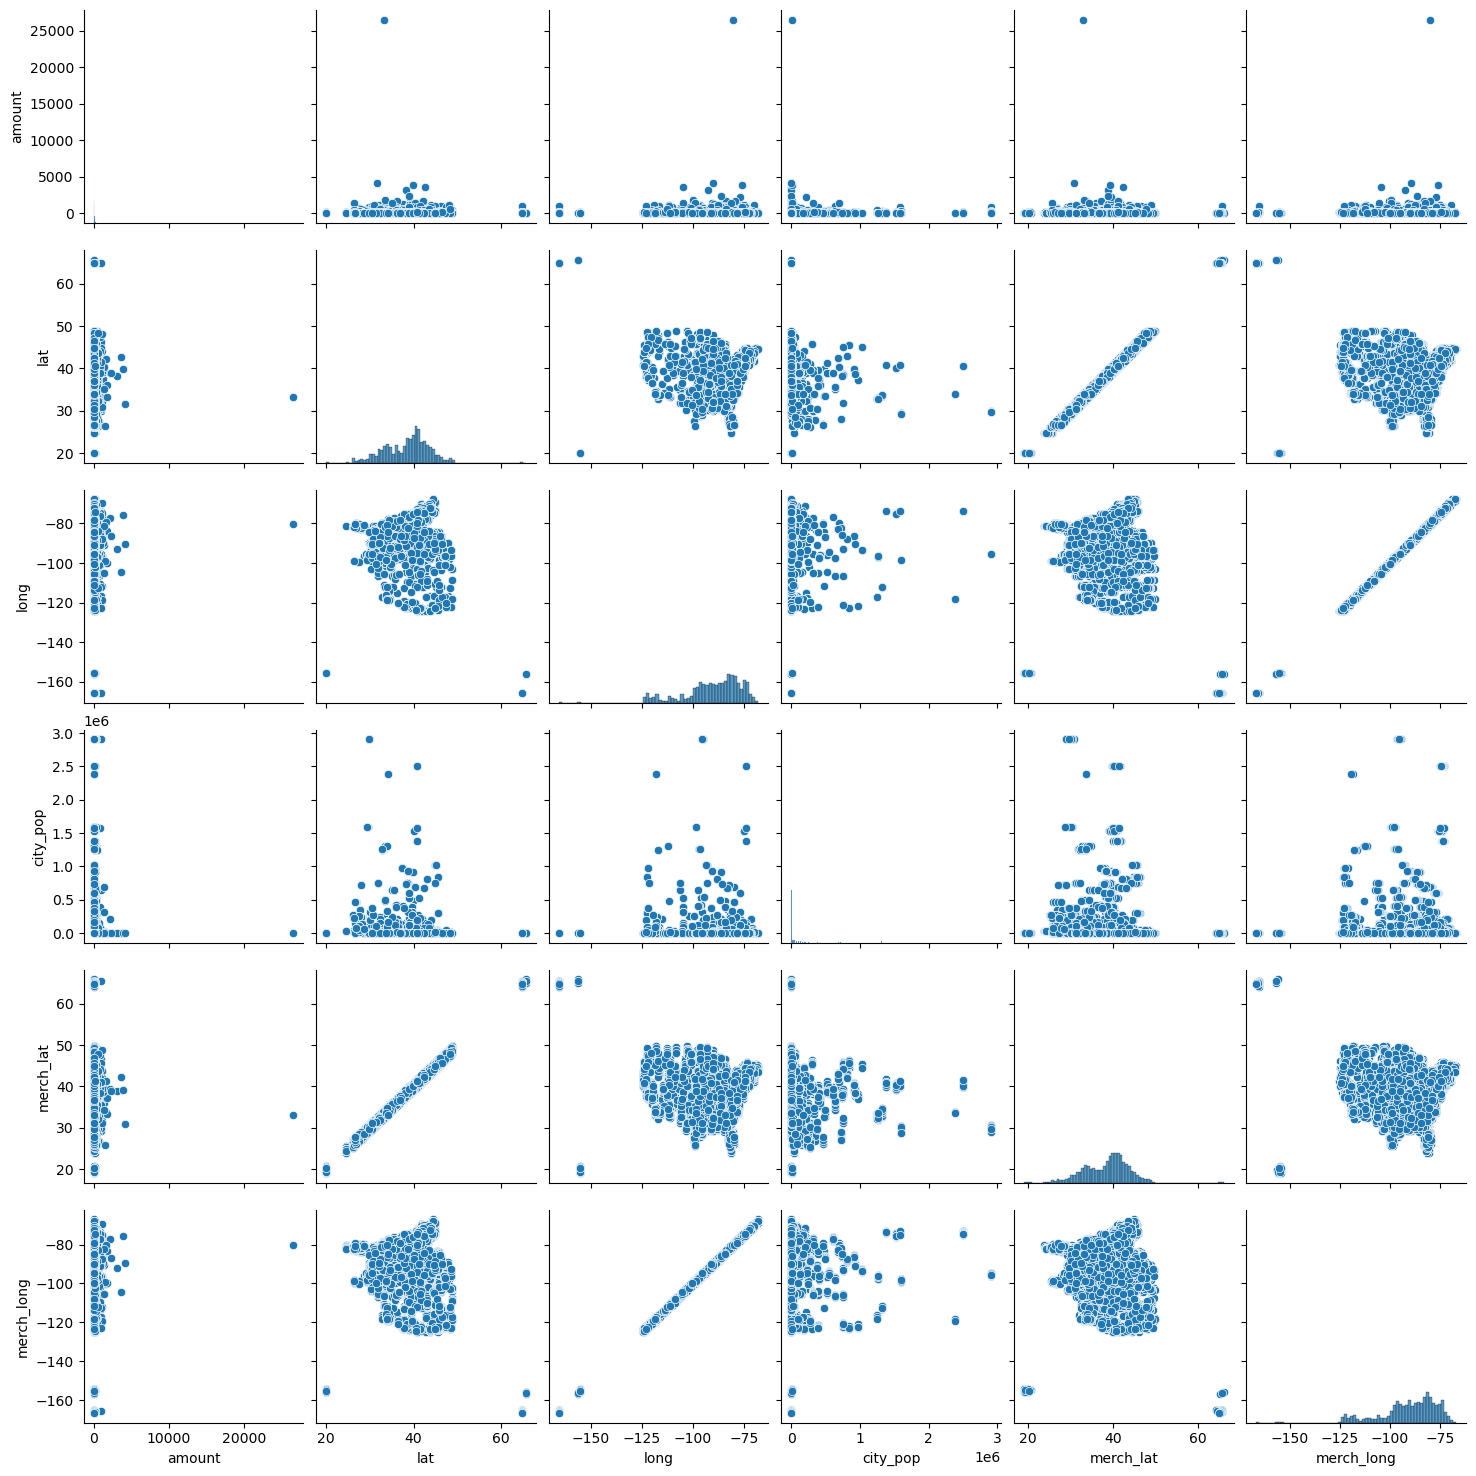

In [40]:
df_continuous = df.drop(columns=CATEGORICAL_LIST)
display(df_continuous.corr())
sns.pairplot(df_continuous)

**Q4. Pairplot을 통해 본 데이터의 모습은 어떠한가?**\
A4. lat과 merch_lat, long과 merch_long 사이에는 강한 상관관계가 보인다.\
이 외에 다양한 feature들에서 이상치 값이 나타나는 것으로 확인되어, Boxplot 분석을 진행한다.

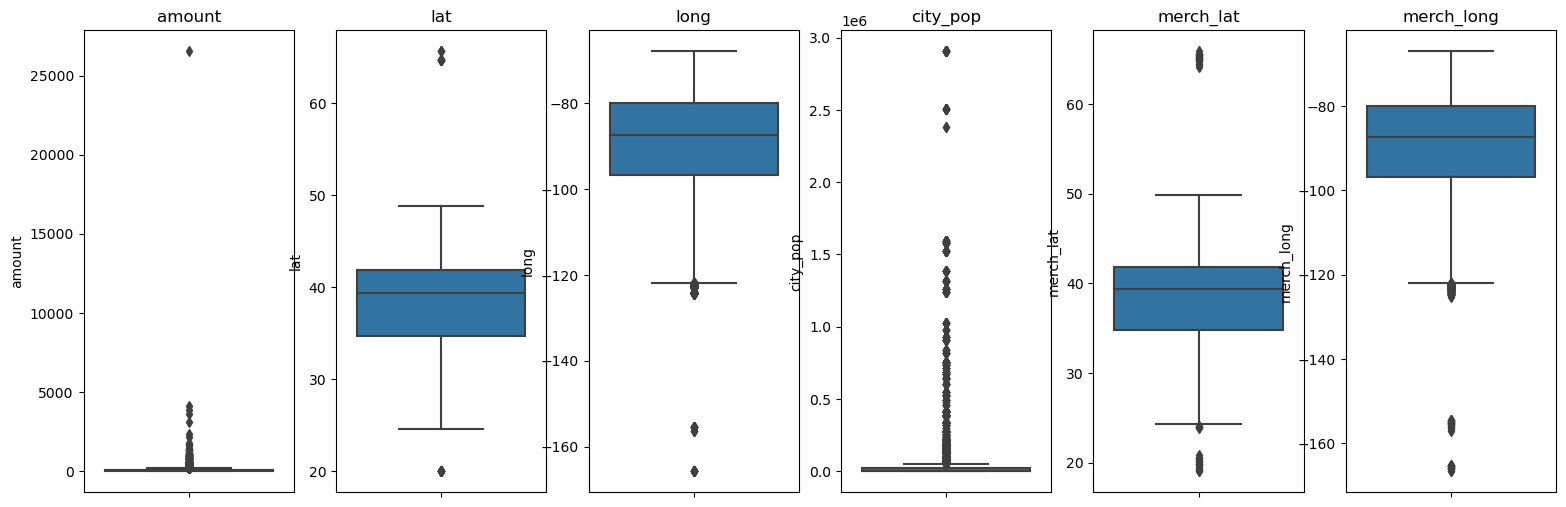

In [37]:
col_list = df_continuous.columns
fig, axes = plt.subplots(1, len(col_list), figsize=(19, 6))
for i in range(len(col_list)):
    sns.boxplot(y=df_continuous[col_list[i]], ax=axes[i])
    axes[i].set_title(col_list[i])

**Q5. 이상치 값의 분포는 어떠한가?**\
amount에 극단적인 이상치가 확인되고, 위도/경도 feature의 경우 대체로 양호한 편이다.\
city_pop의 경우 데이터가 밀집되지 않고 상당히 흩어져 있는 모습을 보인다.\
이상치 값들은 5번 문항에서 삭제한다.

In [219]:
df_fraud = df[df['is_fraud'] == 1]
df_non_fraud = df[df['is_fraud'] != 1]

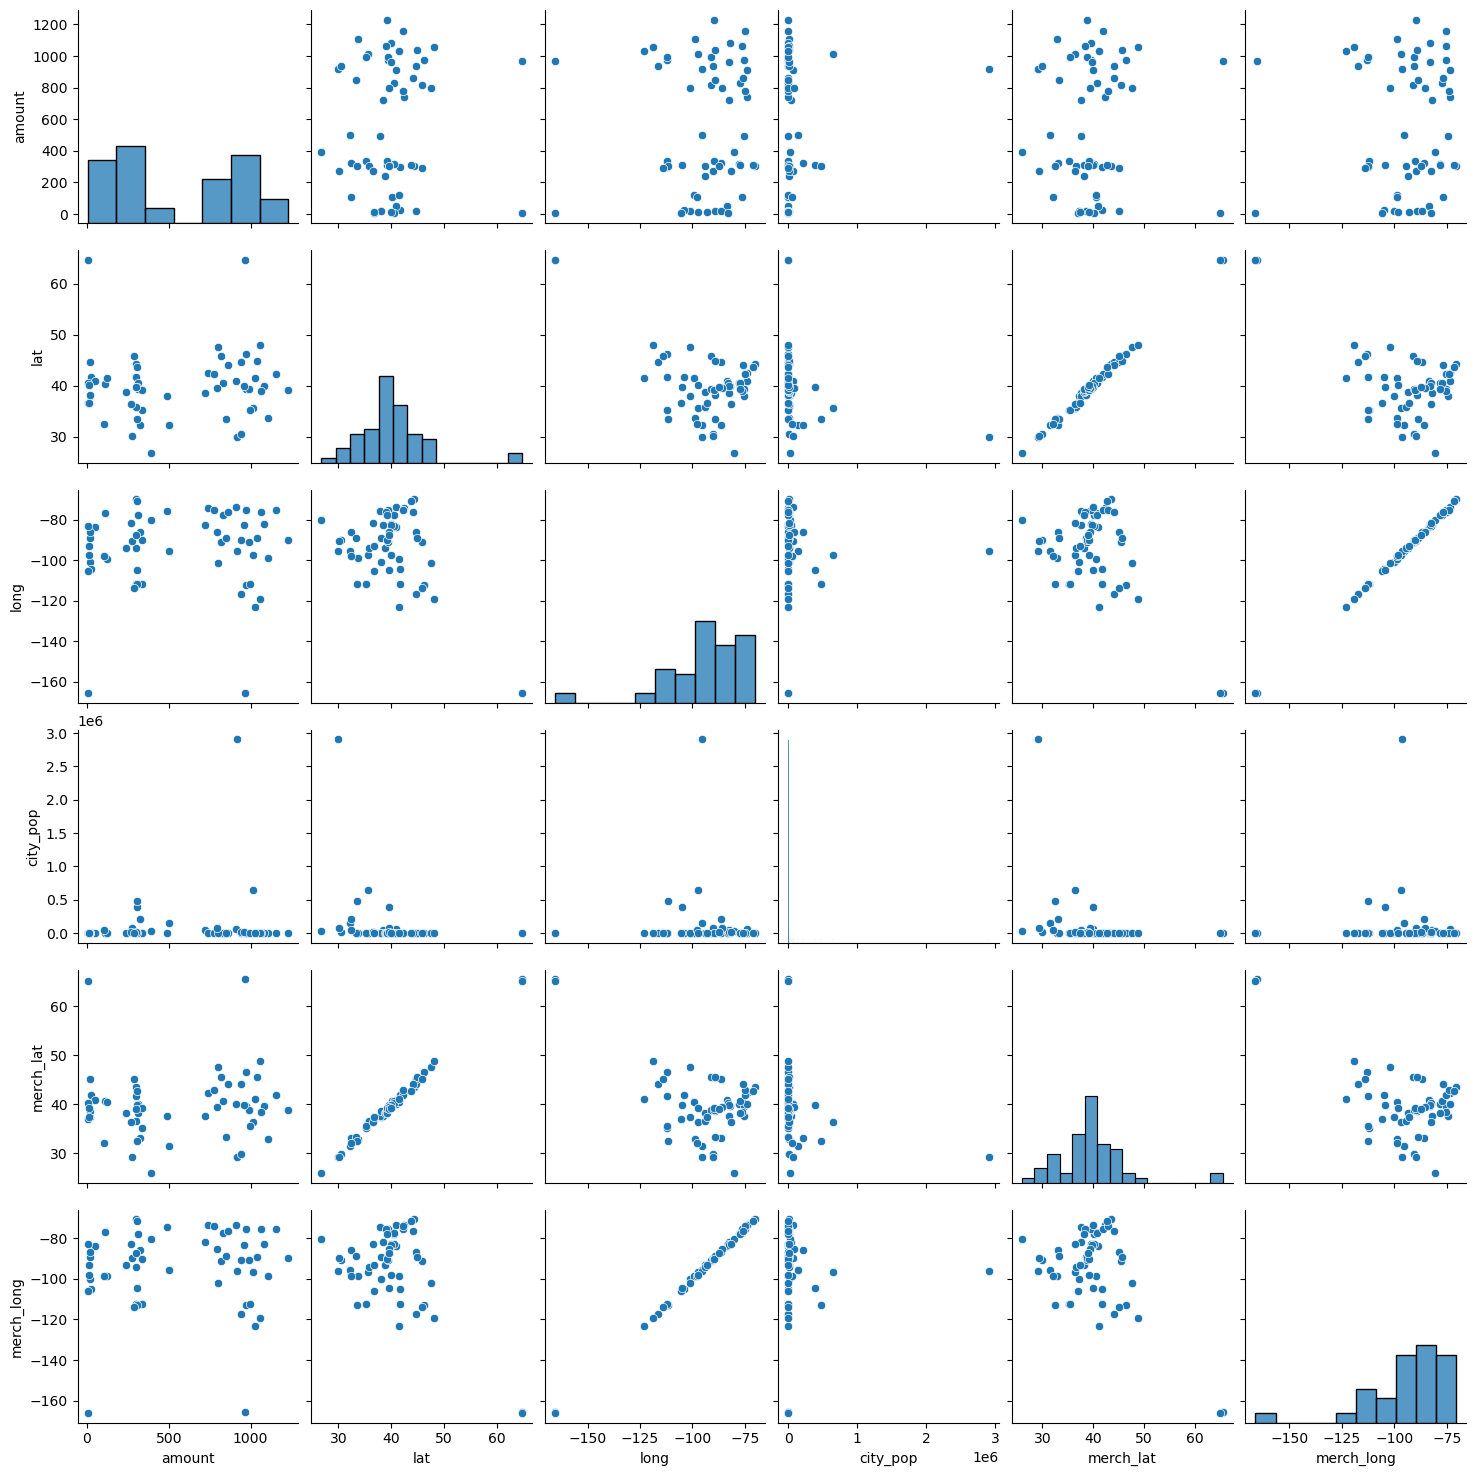

In [57]:
sns.pairplot(df_fraud.drop(columns=CATEGORICAL_LIST))

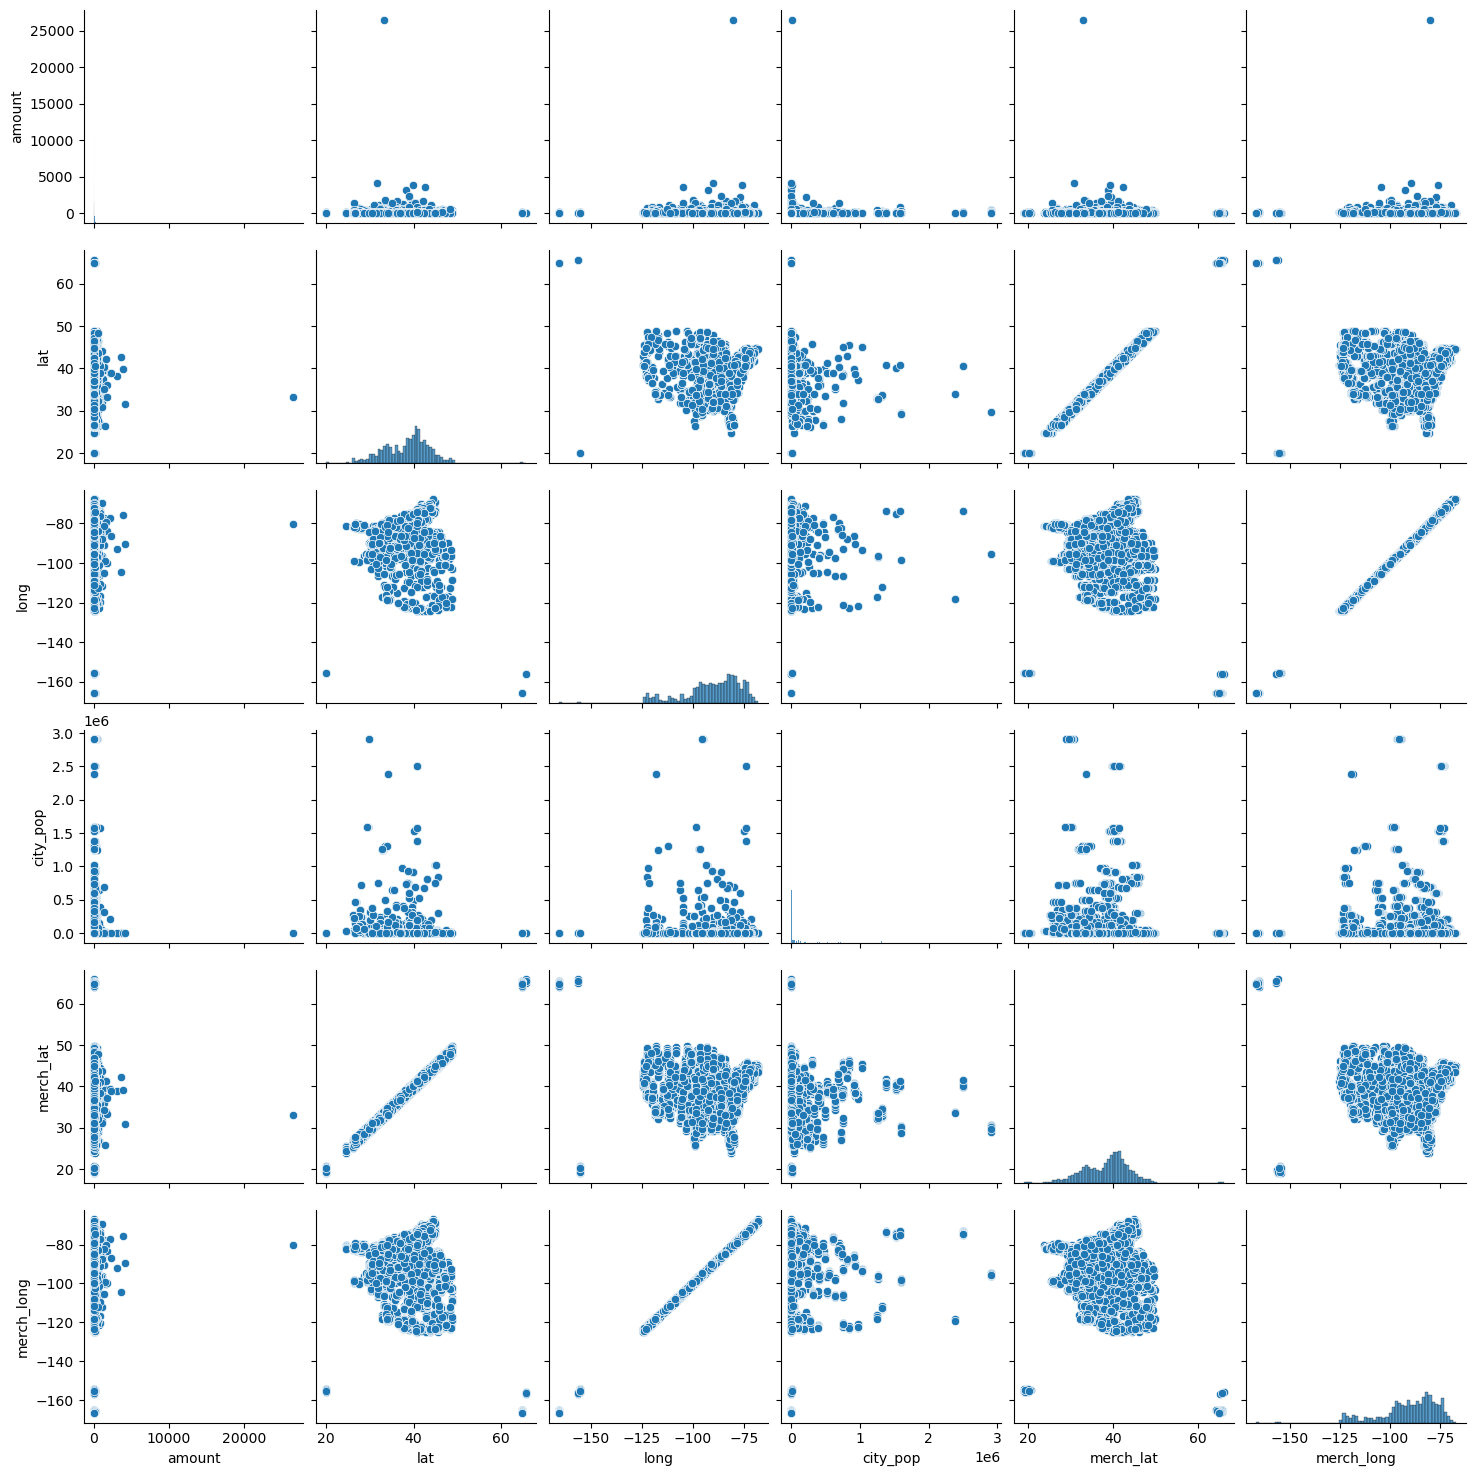

In [58]:
sns.pairplot(df_non_fraud.drop(columns=CATEGORICAL_LIST))

**Q6. Fraud 데이터와 Non-Fraud 데이터의 분포는 어떠한가?**\
Fraud 데이터에는 city_pop에 이상치가, Non-Fraud 데이터에는 amount 등의 feature에 이상치가 존재한다.

***

## 5. Create, compare, and discuss four different models that can determine fraudulent transactions (these four models include two regularization models)
- X must contain at least one catagorical and one numerical variable each.
- You may delete features or create new ones using existing features. However, you must provide a convincing explanation for your deletions and additions.
- Perform data preprocessing and any other steps you think necessary.
- If you think there are problematic outliers, feel free to delete them. (Of course you shoud provide a justifiable explantion for that as well)
- Use 0 for all random_states.
- Use default for train, test split ratio.

## 5. fraud 거래를 판별해낼 수 있는 4 가지 다른 모델을 만들고 비교하여 논하시오 (이 네 가지 모델에는 regularization 모델 두 가지가 포함됩니다)

- X에는 catgorical, numberical 변수들이 각각 최소 1개 이상 포함되어 있어야 합니다.
- feature를 삭제하거나, 기존 feature를 사용하여 새로 만들어 써도 무방함. 단, 삭제 및 추가 이유를 설득력 있게 설명하여야 합니다.
- data preprocessing 및 필요하다고 생각되는 절차를 거치세요.
- 문제가 있는 이상치라고 생각되면 삭제해도 좋습니다 (물론 그렇게 생각한 타당한 설명을 제시해야 합니다)
- random_state는 모두 0을 사용해 주세요.
- train, test split 비율은 default를 사용합니다.

In [220]:
RANDOM_SEED = 0
df_backup1 = df.copy()

In [155]:
# FOR RECOVERY
# df = df_backup1.copy()

In [221]:
df.head(3)

,category,amount,gender,zip,lat,long,city_pop,job,merch_lat,merch_long,is_fraud
ID,,,,,,,,,,,
1,kids_pets,43.17,M,31042,32.8088,-83.1740,1841,Film/video editor,32.354787,-84.081335,0
2,food_dining,60.05,M,64659,39.7795,-93.3014,964,Tourist information centre manager,39.986066,-93.931767,0
3,shopping_net,4.72,M,16314,41.5205,-80.0573,5507,Retail merchandiser,42.337299,-79.533712,0


**Q1. 삭제해야 할 column이 있는가?**

- zip: 우편번호는 사실상 명목변수인데, 그 종류가 905가지에 달한다. 전체 데이터 수에 비해 지나치게 종류가 많으므로 삭제한다.
- jobs: 마찬가지로 job도 종류가 475가지에 달한다. 전체 데이터 수 10486에 비해 지나치게 많으므로 삭제한다.

이 외 다른 feature는 그대로 사용한다.

In [222]:
df.drop(columns=['zip', 'job'], inplace=True)

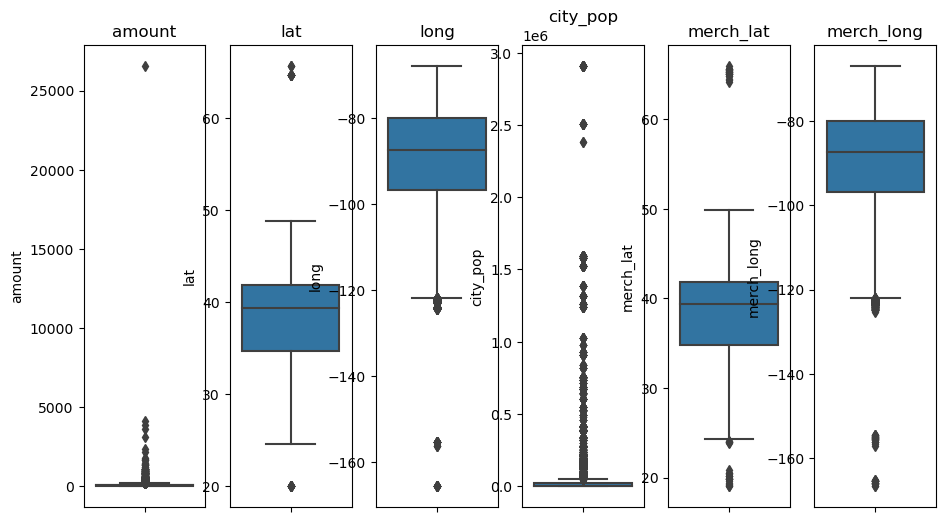

In [225]:
col_list = df_continuous.columns
fig, axes = plt.subplots(1, len(col_list), figsize=(11, 6))
for i in range(len(col_list)):
    sns.boxplot(y=df_continuous[col_list[i]], ax=axes[i])
    axes[i].set_title(col_list[i])

**Q2. 삭제해야 할 이상치는 무엇인가?**\
amount의 상단, lat의 상하단, long의 하단, city_pop의 상단, merch_lat의 상하단, merch_long의 상하단에\
이상치 데이터가 존재한다.\
Boxplot 상에서 지나치게 Q1~Q3와 멀리 떨어져 있는 값들을 삭제한다.

In [226]:
df_to_drop = df[
    (df['amount'] > 3300)                |
    (df['lat'] == df['lat'].min())       |
    (df['lat'] > 60)                     |
    (df['long'] < -140)                  |
    (df['city_pop'] > 2.0e6)             |
    (df['merch_lat'] > 60)               |
    (df['merch_lat'] < 21)               |
    (df['merch_long'] < -140)
]
df_to_drop

,category,amount,gender,lat,long,city_pop,merch_lat,merch_long,is_fraud
ID,,,,,,,,,
132,misc_net,10.84,F,29.7972,-95.3288,2906700,30.553688,-94.696251,0
299,travel,26544.12,M,33.3364,-80.1859,4471,33.020256,-80.125607,0
497,shopping_net,966.11,M,64.7556,-165.6723,145,65.468863,-165.473127,1
548,misc_net,27.54,F,29.7972,-95.3288,2906700,30.268797,-95.356877,0
806,food_dining,115.30,F,29.7972,-95.3288,2906700,29.737217,-94.976378,0
...,...,...,...,...,...,...,...,...,...
9968,home,89.21,F,40.6816,-73.9798,2504700,41.491175,-74.703199,0
9993,travel,4136.20,M,31.6453,-90.1801,1196,30.864606,-89.730409,0
10368,kids_pets,86.92,M,64.7556,-165.6723,145,64.856971,-166.646444,0


In [ ]:
df.drop(df_to_drop.index, inplace=True)

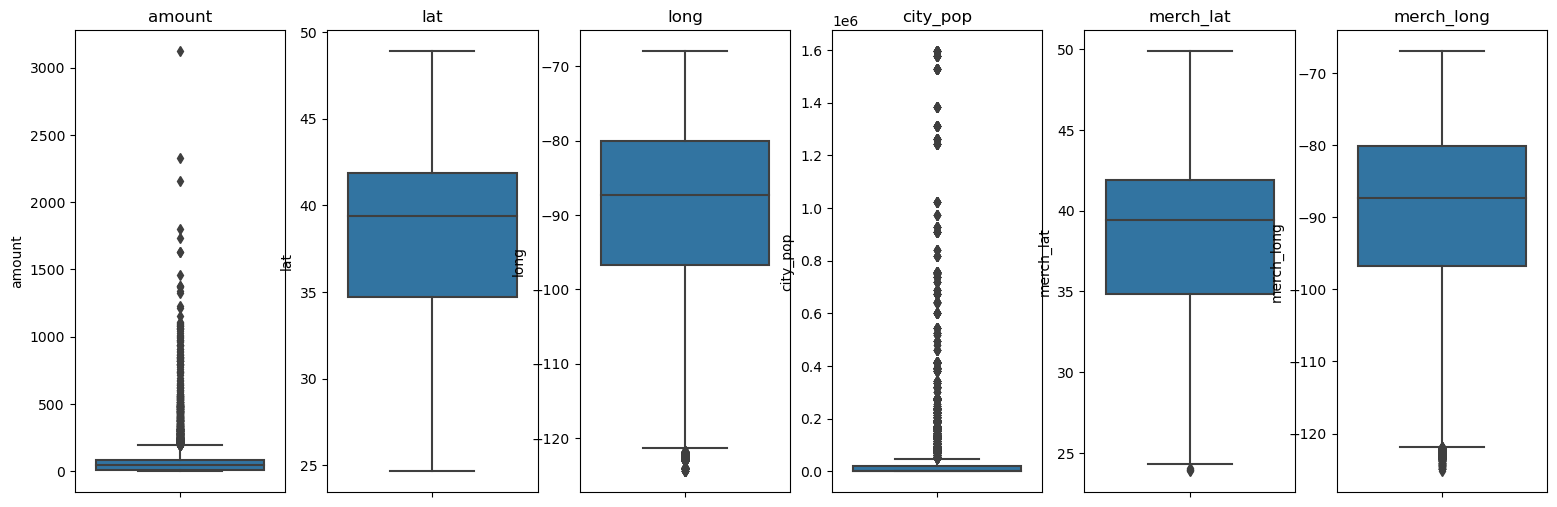

In [230]:
col_list = ['amount', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']
fig, axes = plt.subplots(1, len(col_list), figsize=(19, 6))
for i in range(len(col_list)):
    sns.boxplot(y=df[col_list[i]], ax=axes[i])
    axes[i].set_title(col_list[i])
plt.show()

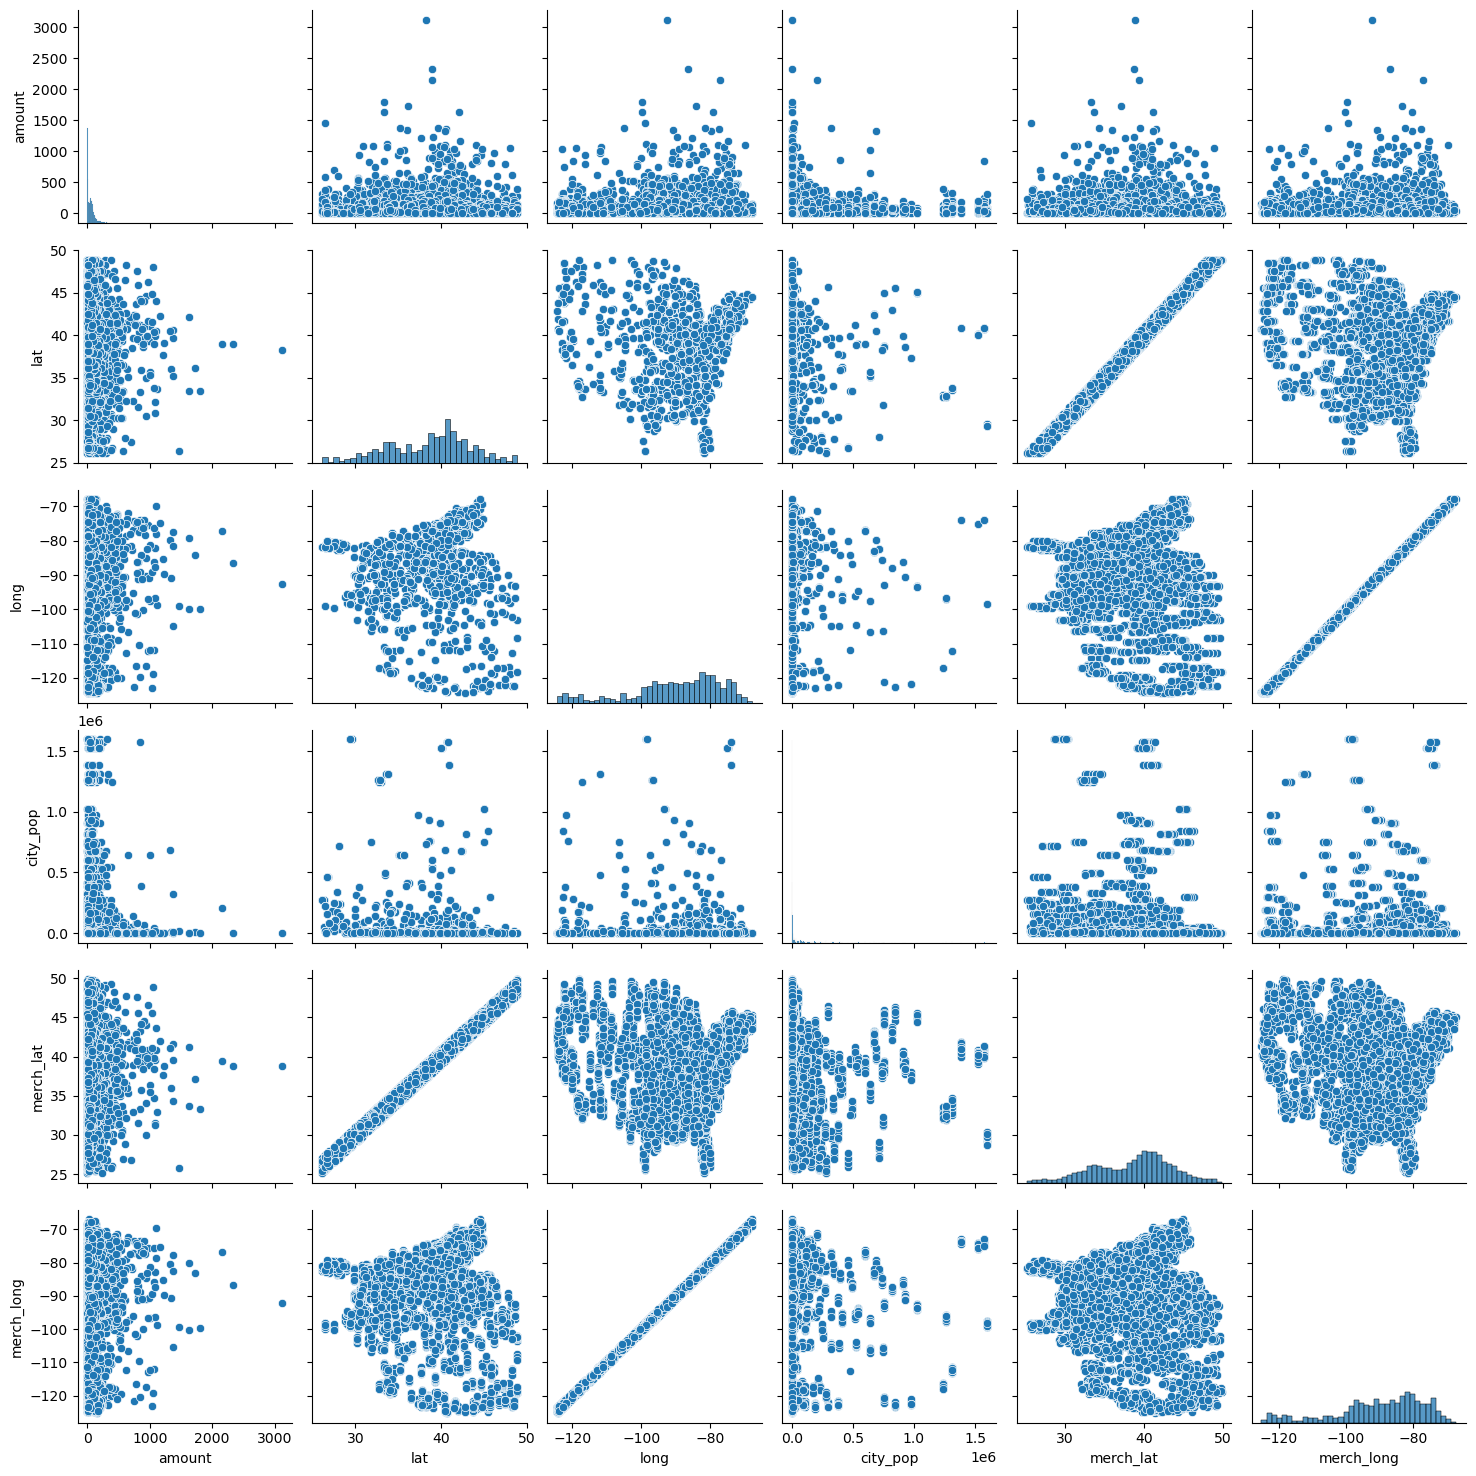

In [101]:
sns.pairplot(df[col_list])

One-Hot Encoding & Train-Test split

In [231]:
df = pd.get_dummies(df, columns=['category', 'gender'])
df.head(3)

,amount,lat,long,city_pop,merch_lat,merch_long,is_fraud,category_entertainment,category_food_dining,category_gas_transport,...,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_F,gender_M
ID,,,,,,,,,,,,,,,,,,,,,
1,43.17,32.8088,-83.1740,1841,32.354787,-84.081335,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,60.05,39.7795,-93.3014,964,39.986066,-93.931767,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,4.72,41.5205,-80.0573,5507,42.337299,-79.533712,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [277]:
df.columns

Index(['amount', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long',
       'is_fraud', 'category_entertainment', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'gender_F', 'gender_M'],
      dtype='object')

종속변수가 0, 1의 nominal variable이므로 stratify 옵션을 붙인다.

In [232]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=['is_fraud']), df.is_fraud,
    stratify=df.is_fraud, random_state=RANDOM_SEED)

**Q3. 어떤 Scaling method가 가장 바람직한가?**\
amount와 population이 정규분포를 따르지 않으므로, Robust scaler를 이용한다.\
이때 one-hot-encoding된 값이 같이 scaled 되지 않도록 슬라이싱 해준 뒤, 다시 이어 붙인다.

In [233]:
scaler = RobustScaler()

X_train_scaled = np.concatenate([
    scaler.fit_transform(X_train.iloc[:, :6]), X_train.iloc[:, 6:]
], axis=1)

X_test_scaled = np.concatenate([
    scaler.transform(X_test.iloc[:, :6]), X_test.iloc[:, 6:]
], axis=1)

**Q. 어떤 SMOTE 알고리즘이 가장 바람직한가?**\
독립변수와 종속변수에 categorical / continuous variable이 섞여 있으니\
SMOTENC를 이용한다.

In [291]:
#sm = SMOTENC(categorical_features=['gender_F','gender_M'])
#X_sm_train, y_sm_train = sm.fit_resample(X_train, y_train)

허나 SMOTENC를 사용하는 경우 index range 오류가 나서 사용을 못했습니다.

In [292]:
knr = KNeighborsRegressor(n_neighbors=5).fit(X_train_scaled, y_train)
print(knr.score(X_train_scaled, y_train))
print(knr.score(X_test_scaled, y_test))

0.5594310647294317
0.17556071152358832


In [239]:
lr = LinearRegression().fit(X_train_scaled, y_train)
print(lr.score(X_train_scaled, y_train))
print(lr.score(X_test_scaled, y_test))

0.12469589711105133
-0.0003590319968211908


In [257]:
ridge = Ridge(alpha=100).fit(X_train_scaled, y_train)
print(ridge.score(X_train_scaled, y_train))
print(ridge.score(X_test_scaled, y_test))

0.12380695689520926
0.001196609370691215


In [293]:
lasso = Lasso(alpha=1, max_iter=100).fit(X_train_scaled, y_train)
print(lasso.score(X_train_scaled, y_train))
print(lasso.score(X_test_scaled, y_test))

0.0
-3.1370952406906127e-06


kNeighborsRegressor의 성능이 그나마 가장 나은 것으로 평가됨.\
다른 모델의 경우 세트에 문제가 있었는지 test set 점수가 매우 나쁨.

## 6. Create a model using Linear Modeling to predict the transaction amount.


## 6. 거래 금액을 예측할 수 있는 모델을 Linear Modeling을 사용하여 만드시오.

사기 거래는 분석에 사용할 필요가 없으니 모두 삭제한다.

In [187]:
df2 = df_origin.copy()
df2.set_index('ID', inplace=True)
df2.drop(index=df_fraud.index, inplace=True)
df2.drop(columns='is_fraud', inplace=True)

In [188]:
df2.head(3)

,category,amount,gender,zip,lat,long,city_pop,job,merch_lat,merch_long
ID,,,,,,,,,,
1,kids_pets,43.17,M,31042,32.8088,-83.1740,1841,Film/video editor,32.354787,-84.081335
2,food_dining,60.05,M,64659,39.7795,-93.3014,964,Tourist information centre manager,39.986066,-93.931767
3,shopping_net,4.72,M,16314,41.5205,-80.0573,5507,Retail merchandiser,42.337299,-79.533712


아까와 같은 방법으로 이상치를 제거한다.

In [189]:
df_to_drop = df2[
    (df2['amount'] > 3300)                |
    (df2['lat'] == df2['lat'].min())      |
    (df2['lat'] > 60)                     |
    (df2['long'] < -140)                  |
    (df2['city_pop'] > 2.0e6)             |
    (df2['merch_lat'] > 60)               |
    (df2['merch_lat'] < 21)               |
    (df2['merch_long'] < -140)
]
df2.drop(index=df_to_drop.index, inplace=True)

분석에 방해가 되는 column을 제거한다.

In [190]:
df2.drop(columns=['zip', 'job'], inplace=True)

one-hot-encoding을 시행한다.

In [192]:
df2 = pd.get_dummies(df2)

In [200]:
df2.describe()

,amount,lat,long,city_pop,merch_lat,merch_long,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,...,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_F,gender_M
count,10341.000000,10341.000000,10341.000000,1.034100e+04,10341.000000,10341.000000,10341.000000,10341.000000,10341.000000,10341.00000,...,10341.000000,10341.000000,10341.000000,10341.000000,10341.000000,10341.000000,10341.000000,10341.000000,10341.000000,10341.000000
mean,67.516507,38.534508,-89.938012,7.151871e+04,38.534847,-89.934729,0.074654,0.069046,0.098443,0.03578,...,0.092061,0.094382,0.050382,0.062760,0.069529,0.069239,0.088386,0.032782,0.544531,0.455469
std,107.564625,4.861158,13.261204,2.264449e+05,4.897588,13.277420,0.262845,0.253544,0.297927,0.18575,...,0.289126,0.292373,0.218742,0.242542,0.254364,0.253872,0.283869,0.178075,0.498037,0.498037
min,1.000000,24.655700,-124.440900,2.300000e+01,23.869997,-125.213342,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.610000,34.703200,-96.743000,7.370000e+02,34.812634,-96.778075,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,46.810000,39.401500,-87.349000,2.456000e+03,39.408416,-87.279055,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,83.240000,41.846700,-80.065200,1.968500e+04,41.879968,-80.071512,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,3122.990000,48.887800,-67.950300,1.595797e+06,49.870232,-66.978308,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [201]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    df2.drop(columns='amount'), df2.amount, random_state=RANDOM_SEED)

In [203]:
lr = LinearRegression().fit(X_train2, y_train2)
print(lr.score(X_train2, y_train2))
print(lr.score(X_test2, y_test2))

0.033424055030895405
0.02409562672063381


In [211]:
ridge = Ridge(alpha=100).fit(X_train2, y_train2)
print(ridge.score(X_train2, y_train2))
print(ridge.score(X_test2, y_test2))

0.032828116013045805
0.024033920966725186


In [213]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    df2[['lat', 'long', 'city_pop', 'merch_lat', 'merch_long']], df2.amount, random_state=RANDOM_SEED
)

In [214]:
lr = LinearRegression().fit(X_train2, y_train2)

0.0006811440619486353
-0.00032407848061799527


In [294]:
df2.corr()

,amount,lat,long,city_pop,merch_lat,merch_long,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,...,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_F,gender_M
amount,1.000000,-0.020047,-0.003115,-0.004308,-0.018895,-0.002990,-0.015619,-0.036942,-0.011808,-0.023362,...,-0.023038,-0.030977,0.010770,-0.027717,-0.054860,-0.004545,0.043293,0.038735,0.011512,-0.011512
lat,-0.020047,1.000000,-0.009419,-0.128673,0.993026,-0.008879,0.000913,0.008211,0.014439,-0.017620,...,-0.001695,0.000004,-0.018684,-0.008626,0.010948,-0.001146,-0.003078,-0.011880,-0.046605,0.046605
long,-0.003115,-0.009419,1.000000,-0.039507,-0.010729,0.999060,0.006308,-0.004427,-0.024991,0.007586,...,-0.015790,0.003432,-0.002992,0.020975,-0.007774,0.014067,0.005846,0.006270,-0.065500,0.065500
city_pop,-0.004308,-0.128673,-0.039507,1.000000,-0.127767,-0.039660,0.023449,0.007808,-0.005353,0.029628,...,0.011904,-0.004410,-0.005345,-0.001395,-0.007555,-0.001301,-0.007783,-0.002014,-0.002467,0.002467
merch_lat,-0.018895,0.993026,-0.010729,-0.127767,1.000000,-0.010213,0.000977,0.007425,0.017736,-0.018943,...,-0.002963,0.000418,-0.018724,-0.009364,0.011630,-0.002310,-0.002727,-0.010975,-0.045906,0.045906
merch_long,-0.002990,-0.008879,0.999060,-0.039660,-0.010213,1.000000,0.006195,-0.004591,-0.024959,0.008072,...,-0.015801,0.004003,-0.002973,0.021083,-0.007569,0.013623,0.005318,0.006272,-0.065625,0.065625
category_entertainment,-0.015619,0.000913,0.006308,0.023449,0.000977,0.006195,1.000000,-0.077353,-0.093858,-0.054715,...,-0.090445,-0.091695,-0.065424,-0.073501,-0.077644,-0.077470,-0.088443,-0.052292,-0.007667,0.007667
category_food_dining,-0.036942,0.008211,-0.004427,0.007808,0.007425,-0.004591,-0.077353,1.000000,-0.089991,-0.052461,...,-0.086719,-0.087917,-0.062729,-0.070472,-0.074445,-0.074278,-0.084799,-0.050137,-0.015927,0.015927
category_gas_transport,-0.011808,0.014439,-0.024991,-0.005353,0.017736,-0.024959,-0.093858,-0.089991,1.000000,-0.063654,...,-0.105222,-0.106676,-0.076113,-0.085509,-0.090329,-0.090126,-0.102892,-0.060835,-0.009994,0.009994
category_grocery_net,-0.023362,-0.017620,0.007586,0.029628,-0.018943,0.008072,-0.054715,-0.052461,-0.063654,1.000000,...,-0.061340,-0.062187,-0.044371,-0.049848,-0.052658,-0.052540,-0.059982,-0.035464,0.004729,-0.004729


amount 변수의 경우 다른 변수들과 큰 상관관계를 보이지 않는데,\
이 때문에 어떤 모델을 써도 훈련세트와 테스트 세트의 점수가 매우 나쁘게 나오는 것으로 판단된다.\
Ridge에서 alpha의 값을 크게 높여 과대적합을 유도해도 제대로 훈련이 되지 않으며,\
계속해서 나쁜 점수만 기록한다.